# Project Proposal: Predicting the Presence of Heart Disease

### Introduction
   
Heart disease refers to the buildup of plaque in the heart's arteries that can ultimately lead to a heart attack, heart failure, or death.  [The Government of Canada website](https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html) identifies heart disease as the 2nd leading cause of death in Canada.  According to 2017–2018 data from the Canadian Chronic Disease Surveillance System (CCDSS):  
* about 1 in 12 (or 2.6 million) Canadian adults age 20 and over live with diagnosed heart disease
* every hour, about 14 Canadian adults age 20 and over with diagnosed heart disease die

Heart disease impacts a significant portion of the population and prevention of heart disease is clearly important so that more people can live longer, healthier lives.  The development of data-driven methods for predicting heart disease can be used to improve prevention processes by advancing our understanding of the associated risk factors and identifying disease at early onset to allow for rapid intervention.

The Cleveland Heart Disease database ([cleve.mod](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod)), available from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), contains 14 variables related to heart disease diagnosis in 303 anonymous patients.  The variable information is as follows:    

* Age (years) 
* Sex (male or female)
* Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)
* Resting blood pressure (mm Hg)
* Cholesterol (mg/dl)
* Fasting blood sugar < 120 mg/dl (true or false)
* Resting electrocardiographic results (normal, abnormal, hypertrophy)
* Max. heart rate (BPM)
* Exercise induced angina (true or false)
* Oldpeak - ST depression induced by exercise relative to rest (mm)
* Slope - the slope of the peak exercise ST segment (upsloping, flat, down sloping)
* Number of major vessels colored by fluoroscopy (0 to 3)  
* Thalassemia blood disorder (normal, fixed defect, reversible defect)
* Presence of heart disease (yes or no)

This project aims to answer the question: can we use the Cleveland Heart Disease database to develop a classification model to predict the presence of heart disease in a patient, and if so, what is the accuracy of the classification model?

In [2]:
# load libraries and set seed value
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(2000) 

In [3]:

data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")

data_selected <- data |>
    select("age", "resting_blood_pres", "cholesteral", "max_heart_rate", "oldpeak", "number_of_vessels_colored", "healthy_or_sick") |>
    mutate(number_of_vessels_colored = as.numeric(number_of_vessels_colored))
data_2 <- data_selected |>
select (healthy_or_sick)

data_3 <- data_selected |>
select (-healthy_or_sick)

data_4 <- bind_cols(data_2, data_3)
data_4

data_split <- initial_split(data_selected, prop = .75, strata = healthy_or_sick)
data_training <- training(data_split)
data_testing <- testing(data_split)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


healthy_or_sick,age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
buff,63,145,233,150,2.3,0
sick,67,160,286,108,1.5,3
sick,67,120,229,129,2.6,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
sick,49,118,149,126,0.8,3
buff,74,120,269,121,0.2,1
buff,54,160,201,163,0.0,1


### Exploratory Analysis:
In the exploratory analysis, we are looking at box plots and bar graphs of each possible preditor as well as the summarization tables to determine which to use as preditors.

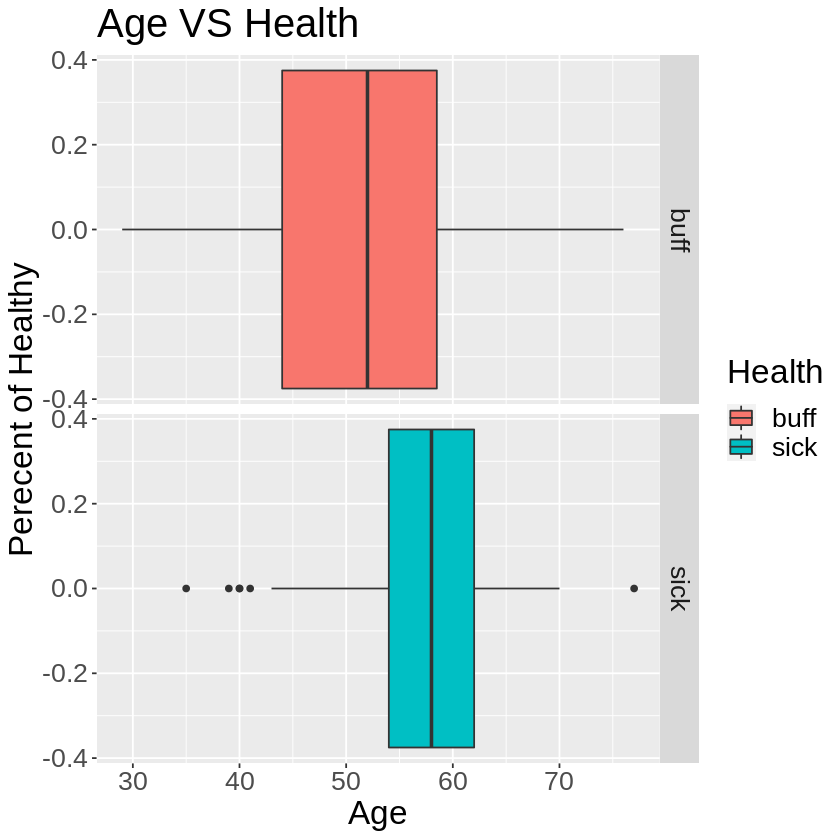

In [76]:
age2_plot <- data_training |>
    ggplot(aes(x = age, fill = healthy_or_sick)) + 
    geom_boxplot(position = 'identity') + 
    xlab("Age") +
    ylab("Perecent of Healthy") +
    labs(fill = "Health") +
    ggtitle("Age VS Health") +
facet_grid(rows = vars(healthy_or_sick)) +
theme(text = element_text(size = 20))
age2_plot

Based on this graph, it can conclude that because there is a relative difference in how age affects health, age will be a good predictor for classifying health. 

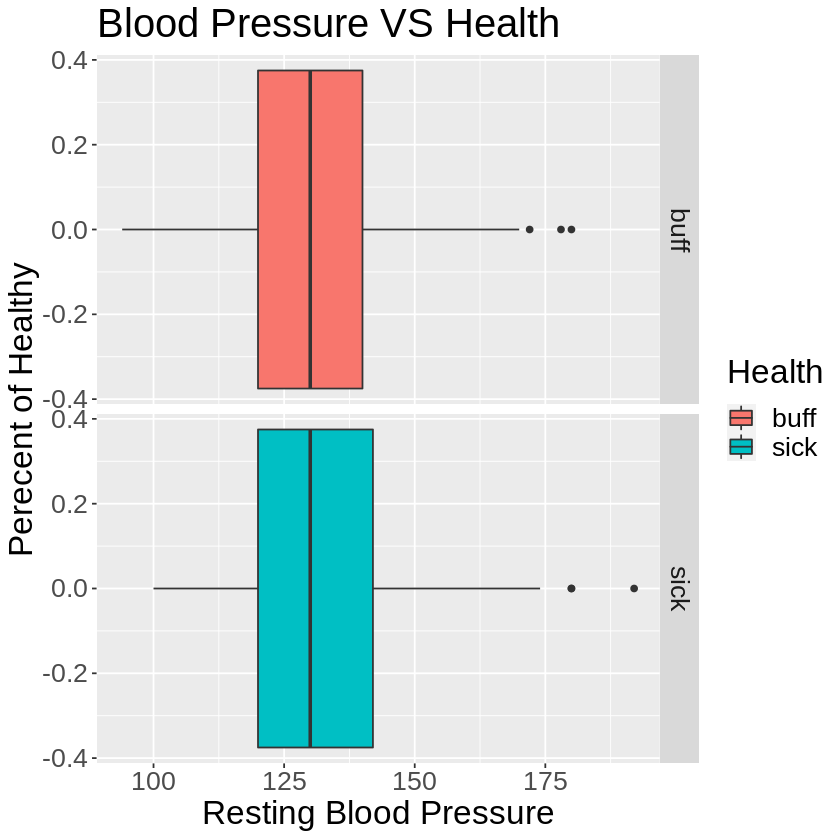

In [77]:
rbp2_plot <- data_training |>
    ggplot(aes(x = resting_blood_pres, fill = healthy_or_sick)) + 
    geom_boxplot(position = 'identity') + 
    xlab("Resting Blood Pressure") +
    ylab("Perecent of Healthy") +
    labs(fill = "Health") +
    ggtitle("Blood Pressure VS Health") +
facet_grid(rows = vars(healthy_or_sick)) +
theme(text = element_text(size = 20))
rbp2_plot

Based on this graph, it can conclude that because there is no relative difference in how resting blood pressure affects health, resting blood pressure will not be a good predictor for classifying health. 

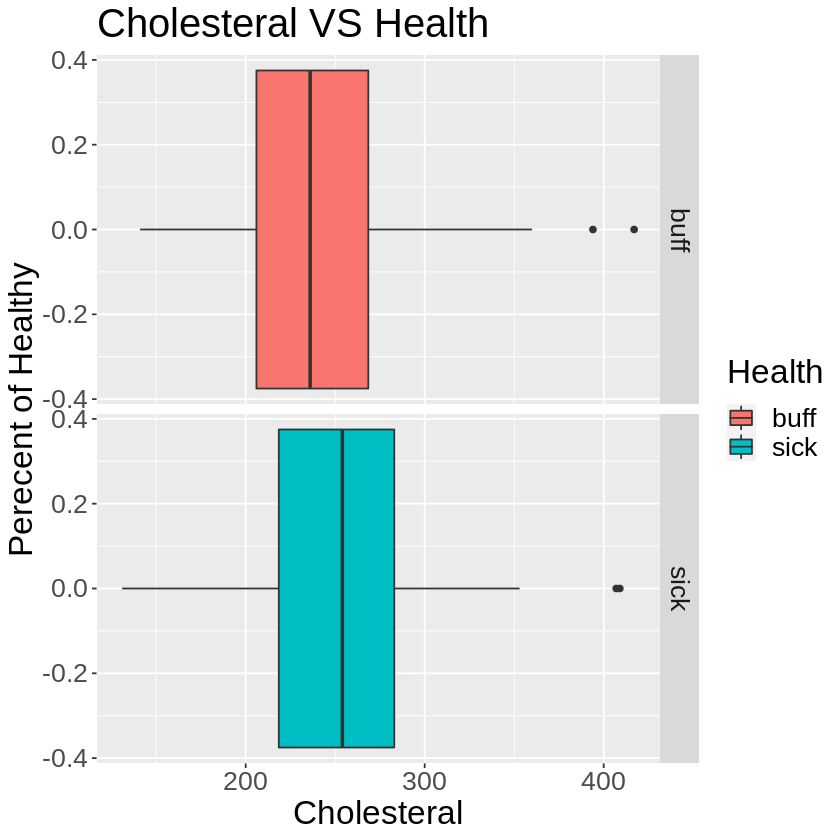

In [78]:
box_plot_cholesteral <- data_training |>
    ggplot(aes(x = cholesteral, fill = healthy_or_sick)) +
    geom_boxplot() +
    labs(x = "Cholesteral", y = "Perecent of Healthy", fill = "Health") +
    theme(text = element_text(size = 20)) +
 ggtitle("Cholesteral VS Health") +
    facet_grid(rows = vars(healthy_or_sick))
box_plot_cholesteral

Based on this graph, it can conclude that because there is no relative difference in how cholesteral affects health, cholesteral will not be a good predictor for classifying health. 

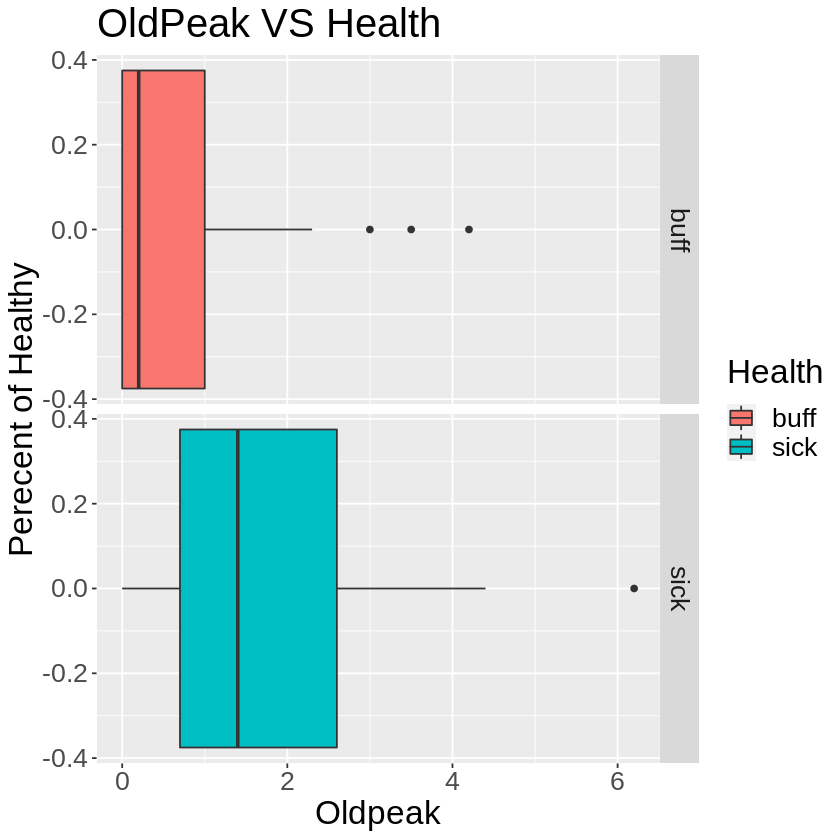

In [ ]:
oldpeak_boxplot <- ggplot(data_training, aes(x= oldpeak, fill = healthy_or_sick)) +
   geom_boxplot()+
   labs(x= "Oldpeak",y="Perecent of Healthy", fill = "Health")+
   theme(text = element_text(size = 20)) +
 ggtitle("OldPeak VS Health") +
facet_grid(rows = vars(healthy_or_sick))
oldpeak_boxplot

Based on this graph, it can conclude that because there is a relative difference in how old peak affects health, old peak will be a good predictor for classifying health. 

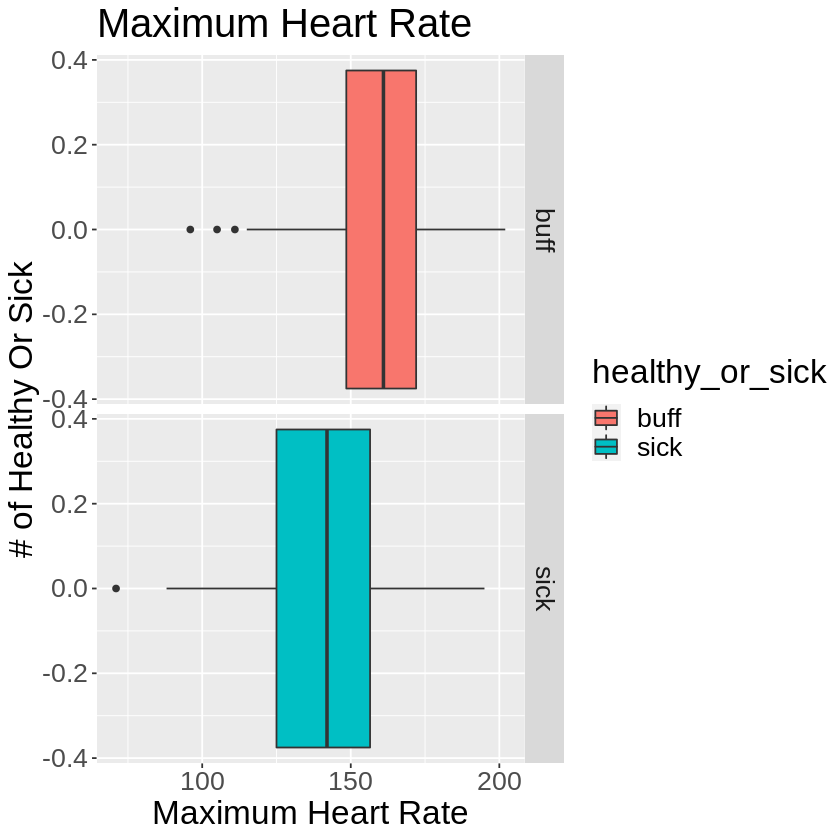

In [80]:
box_plot_mhr <- data_training |>
    ggplot(aes(x = max_heart_rate, fill = healthy_or_sick)) +
    geom_boxplot() +
    labs(x = "Maximum Heart Rate", y = "# of Healthy Or Sick") +
    theme(text = element_text(size = 20)) +
    facet_grid(rows = vars(healthy_or_sick)) +
 ggtitle("Maximum Heart Rate")
box_plot_mhr

Based on this graph, it can conclude that because there is a relative difference in how maximum heart rate affects health, maximum heart rate will be a good predictor for classifying health. 

Warning message:
“Removed 3 rows containing non-finite values (stat_count).”


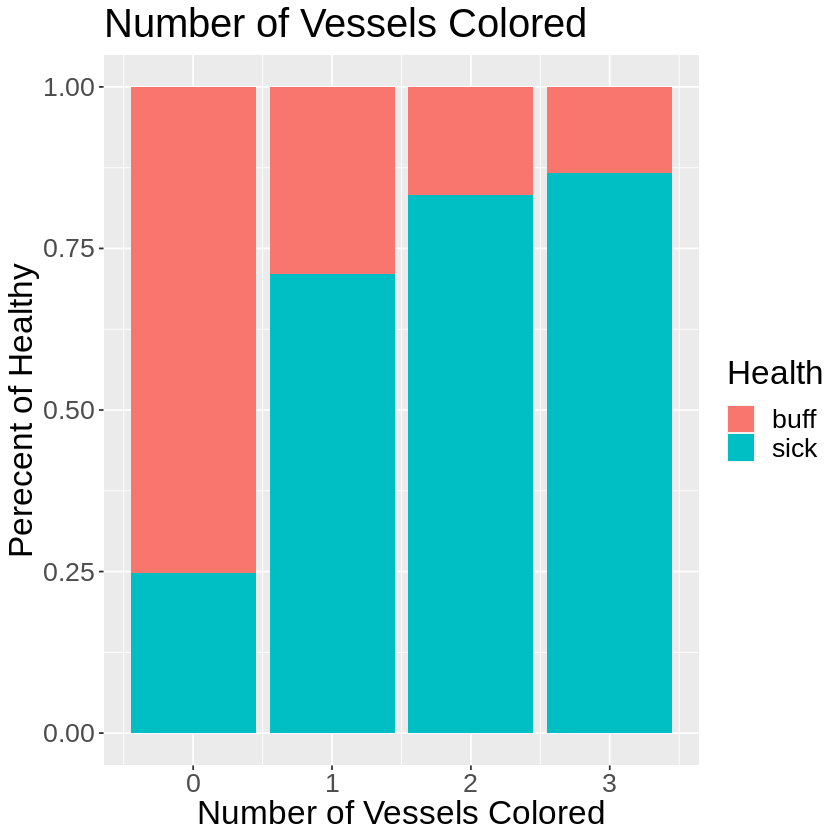

In [81]:
data_vessels_plot2 <- data_training |>
    ggplot(aes(x = number_of_vessels_colored, fill = healthy_or_sick)) +
    geom_bar(position = "fill") +
labs(x= "Number of Vessels Colored",y="Perecent of Healthy", fill = "Health") +
theme(text = element_text(size = 20)) +
ggtitle("Number of Vessels Colored")

data_vessels_plot2

Based on this graph, it can conclude that because there is a relative difference in how the number of vessels colored affects health, number of vessels colored will be a good predictor for classifying health. 

In [87]:
summary_mean_table <- data_training |> 
group_by(healthy_or_sick) |>
summarize(across(age:number_of_vessels_colored, mean, na.rm = TRUE))
summary_mean_table
#Table with the means of each preditor

summary_obs_table <- data_training |> 
group_by(healthy_or_sick) |>
summarize(count=n())
summary_obs_table
#Table with the number of observations in each class

summary_na_table <- data_training |> 
group_by(healthy_or_sick) |>
map_df(~sum(is.na(.)))
summary_na_table
#Table with number of missing rows in each predictor

healthy_or_sick,age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
buff,52.09756,129.3496,242.4634,158.5772,0.5918699,0.2416667
sick,57.32039,133.1456,252.7864,138.9223,1.6553398,1.1747573


healthy_or_sick,count
<chr>,<int>
buff,123
sick,103


age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored,healthy_or_sick
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,3,0
